In [135]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
import warnings 
warnings.filterwarnings('ignore')

In [136]:
data=pd.read_csv('wine.csv')
data.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [137]:
data.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [138]:
data.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [139]:
data.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


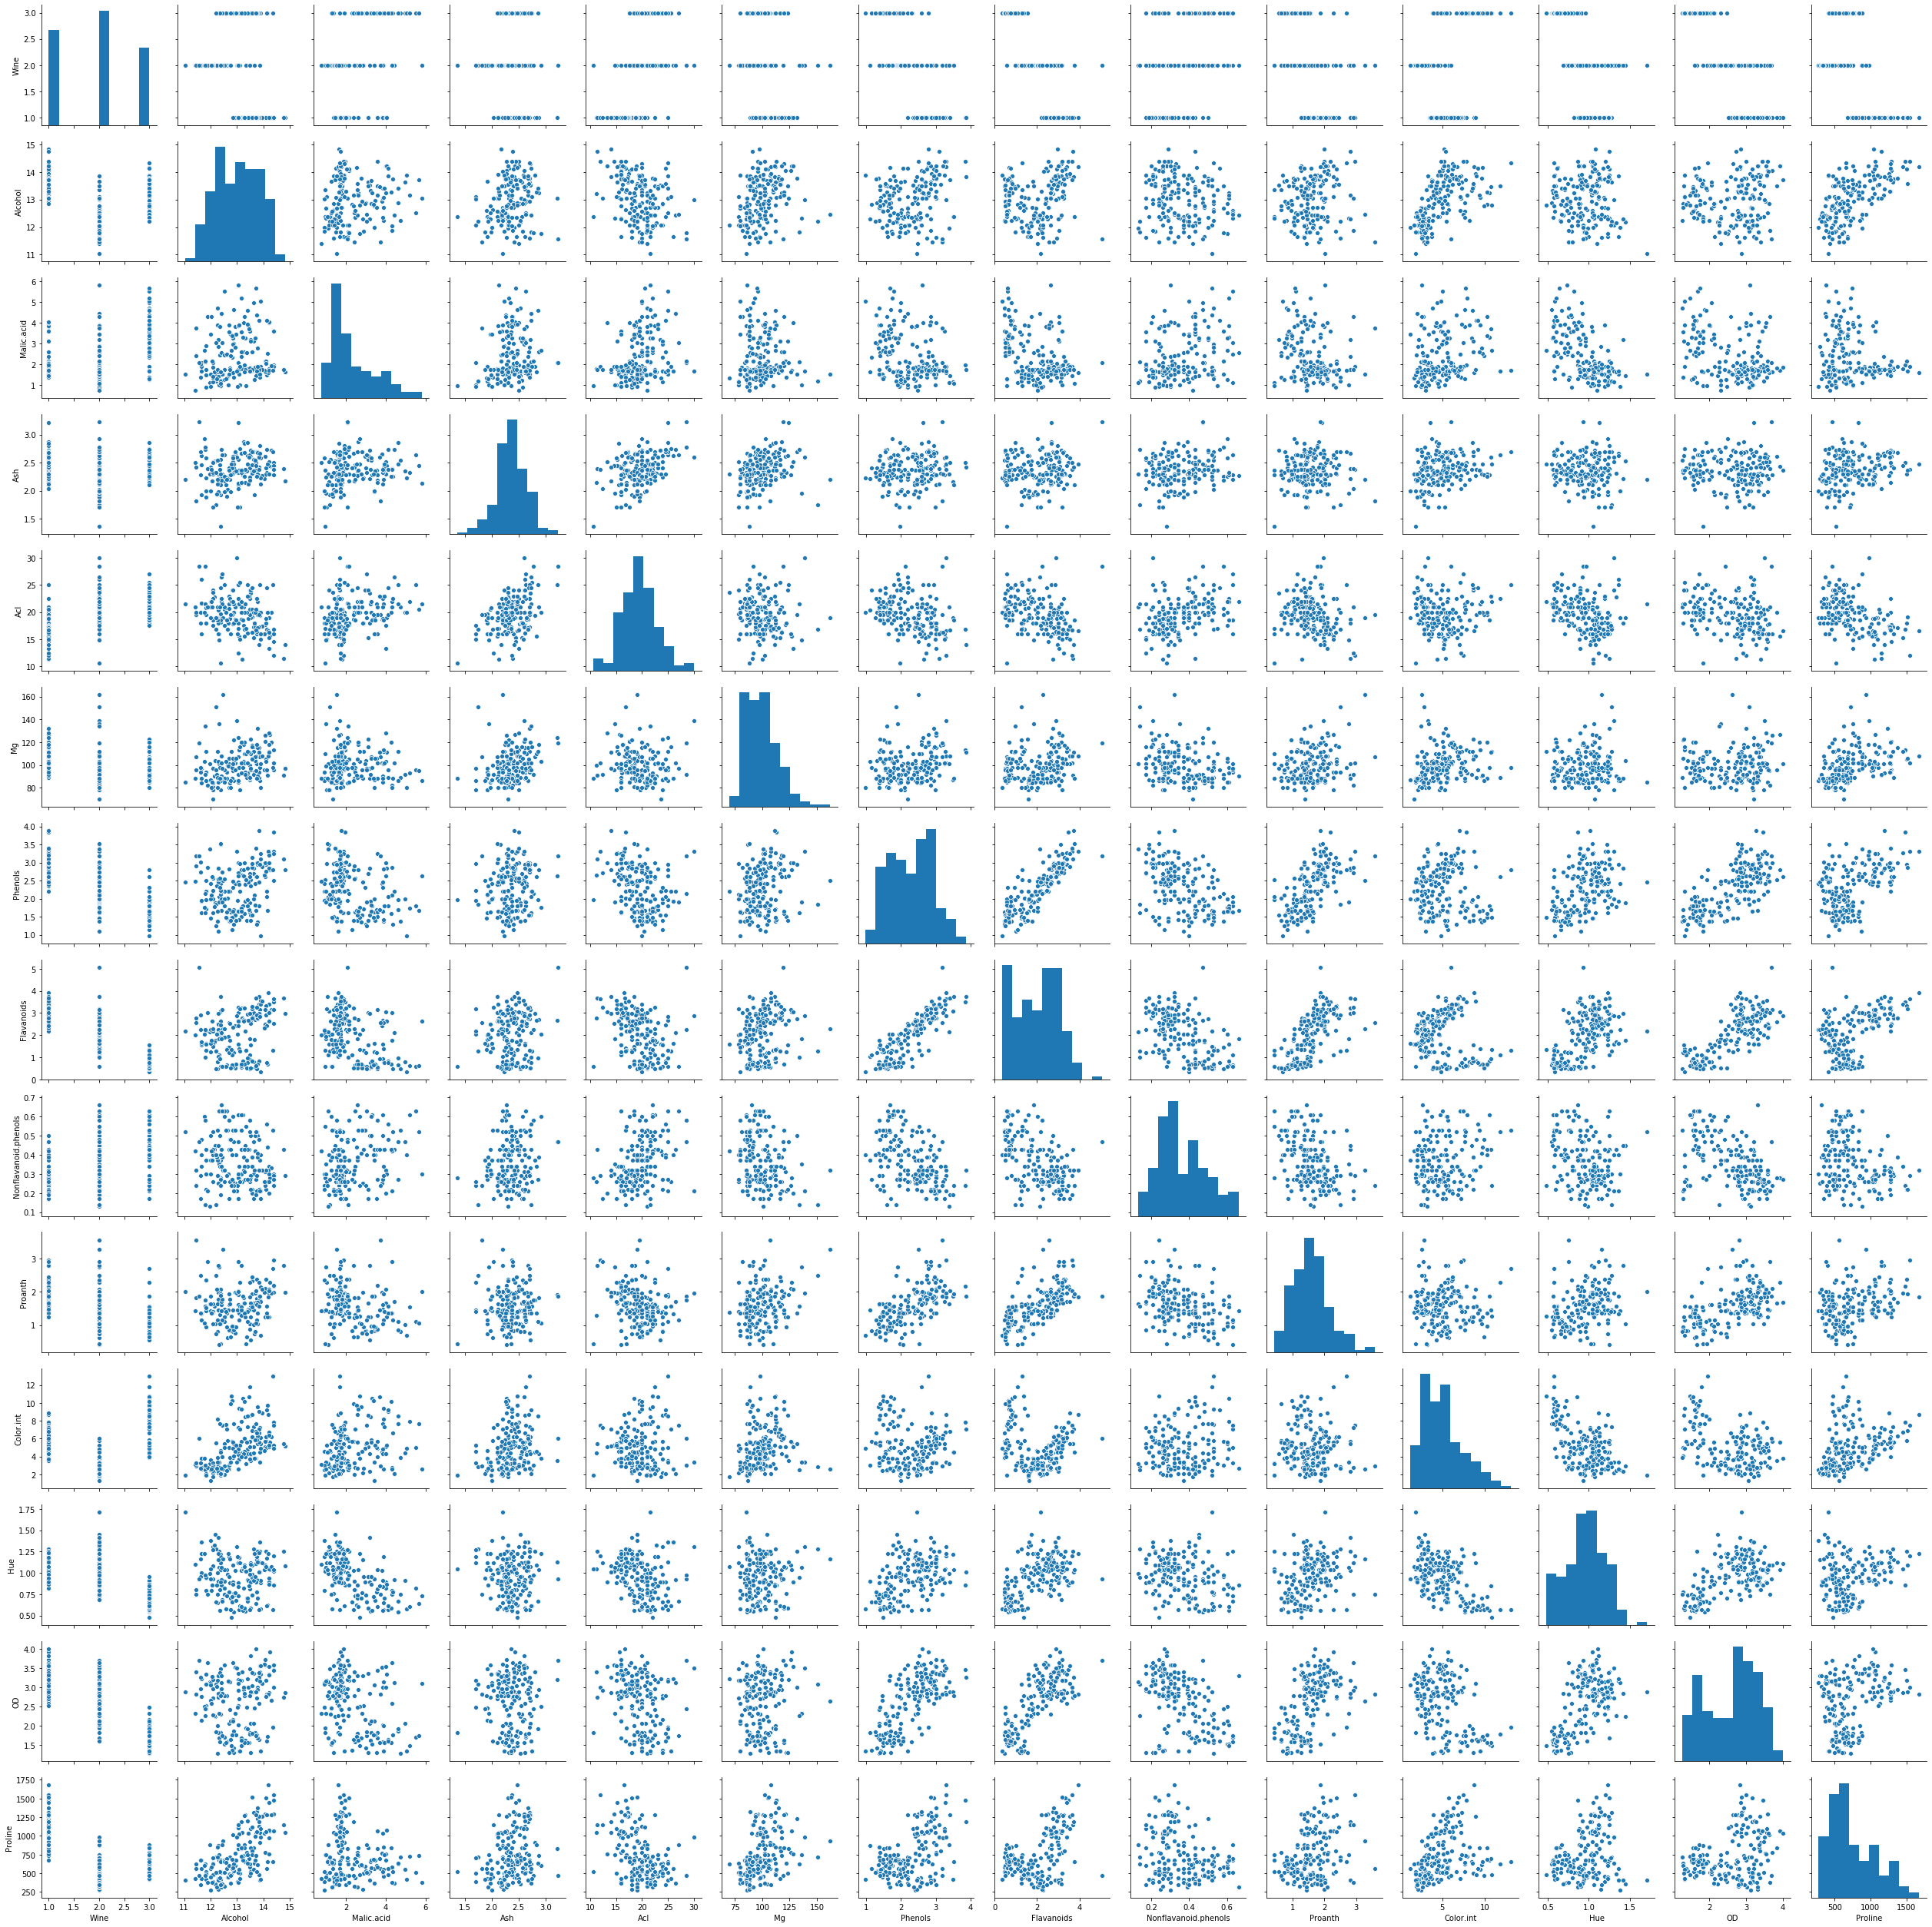

In [140]:
sb.pairplot(data);

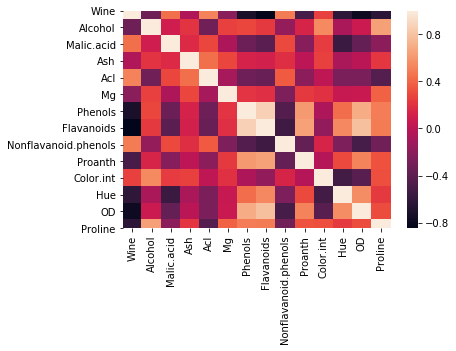

In [141]:
sb.heatmap(data.corr())

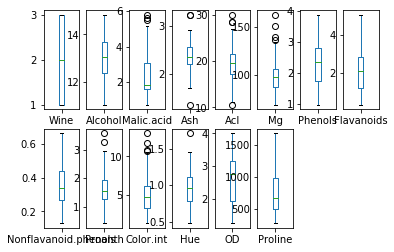

In [142]:
data.plot(kind='box',subplots=True,layout=(2,8));

In [143]:
from scipy.stats import zscore 
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(178, 14)
(168, 14)


In [144]:
data=data_final
data.shape

(168, 14)

In [145]:
data.skew()

Wine                    0.117053
Alcohol                -0.028038
Malic.acid              0.966253
Ash                    -0.250438
Acl                     0.104774
Mg                      0.566522
Phenols                 0.132108
Flavanoids             -0.077205
Nonflavanoid.phenols    0.481810
Proanth                 0.360217
Color.int               0.732580
Hue                    -0.137430
OD                     -0.282514
Proline                 0.744773
dtype: float64

In [146]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.log(data[col])
                       

In [147]:
data.skew()

Wine                    0.117053
Alcohol                -0.028038
Malic.acid              0.231880
Ash                    -0.250438
Acl                     0.104774
Mg                      0.257350
Phenols                 0.132108
Flavanoids             -0.077205
Nonflavanoid.phenols    0.481810
Proanth                 0.360217
Color.int              -0.165416
Hue                    -0.137430
OD                     -0.282514
Proline                 0.070763
dtype: float64

In [148]:
df_x=data.drop(['Wine'],axis=1)
y=data['Wine']

In [149]:
df_x.shape,y.shape

((168, 13), (168,))

In [150]:
from sklearn.preprocessing import StandardScaler

In [151]:
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1.513539,-0.481876,0.250637,-1.209653,2.081214,0.840250,1.068668,-0.669081,1.395565,0.433995,0.403766,1.857453,1.038277
1,0.210929,-0.391659,-0.945351,-2.624711,0.161495,0.600640,0.763248,-0.830933,-0.517348,-0.131747,0.449249,1.127605,1.004333
2,0.160342,0.242578,1.240421,-0.244840,0.241413,0.840250,1.251920,-0.507230,2.380432,0.449808,0.358284,0.804788,1.293778
3,1.690593,-0.186543,0.539324,-0.823728,1.143114,2.517517,1.506437,-0.992784,1.187228,1.159510,-0.414920,1.197783,1.825751
4,0.261516,0.451697,2.065240,0.527010,1.490862,0.840250,0.691983,0.221100,0.505398,-0.162610,0.403766,0.467935,0.150793
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.855910,2.205662,0.333119,0.366208,-0.250479,-0.948835,-1.425598,1.273133,-0.934022,1.130637,-1.415537,-1.202294,0.167017
164,0.463863,1.377882,0.456842,1.170218,0.320544,-0.757147,-1.283068,0.544803,-0.271131,1.011271,-1.142641,-1.454934,0.199139
165,0.299456,1.581198,-0.450459,0.205406,1.625852,-1.092601,-1.344152,0.544803,-0.384770,1.759775,-1.642949,-1.454934,0.456053
166,0.172989,0.451697,0.003191,0.205406,1.625852,-0.996757,-1.354333,1.354059,-0.176433,1.553081,-1.597467,-1.370721,0.470340


In [152]:
x.shape,y.shape

((168, 13), (168,))

In [153]:
x.skew()

Alcohol                -0.028038
Malic.acid              0.231880
Ash                    -0.250438
Acl                     0.104774
Mg                      0.257350
Phenols                 0.132108
Flavanoids             -0.077205
Nonflavanoid.phenols    0.481810
Proanth                 0.360217
Color.int              -0.165416
Hue                    -0.137430
OD                     -0.282514
Proline                 0.070763
dtype: float64

In [178]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45
                                               ,test_size=.22)

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr=LogisticRegression()
lr=lr.fit(x_train,y_train)

In [180]:
lr.score(x_train,y_train)

1.0

In [171]:
y_pred=lr.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)
print(acc_score)
print('\nconfusion matirx\n',confusion_matrix(y_test,y_pred))

print('\nclassification report',classification_report(y_test,y_pred))

1.0

confusion matirx
 [[11  0  0]
 [ 0 10  0]
 [ 0  0 16]]

classification report               precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        16

    accuracy                           1.00        37
   macro avg       1.00      1.00      1.00        37
weighted avg       1.00      1.00      1.00        37



In [182]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state ,test_size=.30)
    lr=LogisticRegression()
    lr=lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print('the max accuracy score corresponding to ',final_r_state,'is:',max_acc_score)

the max accuracy score corresponding to  42 is: 1.0
